## set up notebook

In [1]:
#reload when modified
%load_ext autoreload
%autoreload 2
#activate r magic
%load_ext rpy2.ipython
%matplotlib inline

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import utilities as UT
import missingno as msno
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import gc

random.seed(1976)
np.random.seed(1976)

# Data Anaylsis

## Experiment SetUp

In [4]:
from IPython.display import Image

 <img src="Figures/Slide1.jpeg" width="800" height="800" />

In [5]:
#create a dictionary of gene to desc
#from the gff file
def make_desc(_GFF=os.path.join('genomes','tb927_3','tb927_3.gff')):

    gff =pd.read_csv( _GFF, sep='\t', header=None, comment='#')
    
    gff = gff[gff.iloc[:,2]=='gene']
    #print( gff[gff[gff.columns[-1]].str.contains('Tb427_020006200')] )
    desc = {}
    for n in gff.iloc[:,-1]:
        n=n.replace('%2C',' ')
        item_list = n.split(';')
        #print (item_list)
        temp_dict = {}
        for m in item_list:
            #print(m)
            temp_dict[m.split('=')[0].strip()]=m.split('=')[1].strip()
        #print(temp_dict['ID'])
        #print(temp_dict['description'])
        desc[temp_dict['ID']]=temp_dict.get('description','none')
    return desc

desc_dict = make_desc('InData/tb927_3.gff')
desc_dict['Tb10.v4.0073']

'variant surface glycoprotein (VSG  pseudogene)  putative'

In [6]:
df = pd.read_csv('InData/tb927_3_ks_counts_final.txt',index_col=[0],comment='#',sep='\t')
data_col = df.columns[6:25]
df.head()

,Chr,Start,End,Strand,Length,B_tot_1/res2/B_tot_1/B_tot_1_sorted.bam,B_tot_2/res2/B_tot_2/B_tot_2_sorted.bam,B_tot_3/res2/B_tot_3/B_tot_3_sorted.bam,B_pol_1/res2/B_pol_1/B_pol_1_sorted.bam,B_pol_2/res2/B_pol_2/B_pol_2_sorted.bam,...,B_sub_3/res2/B_sub_3/B_sub_3_sorted.bam,P_tot_1/res2/P_tot_1/P_tot_1_sorted.bam,P_tot_2/res2/P_tot_2/P_tot_2_sorted.bam,P_tot_3/res2/P_tot_3/P_tot_3_sorted.bam,P_pol_1/res2/P_pol_1/P_pol_1_sorted.bam,P_pol_2/res2/P_pol_2/P_pol_2_sorted.bam,P_pol_3/res2/P_pol_3/P_pol_3_sorted.bam,P_sub_1/res2/P_sub_1/P_sub_1_sorted.bam,P_sub_2/res2/P_sub_2/P_sub_2_sorted.bam,P_sub_3/res2/P_sub_3/P_sub_3_sorted.bam
Geneid,,,,,,,,,,,,,,,,,,,,,
Tb10.v4.0073,tryp_X-188b09.p2kB601,929,1489,+,561,1,1,0,0,0,...,2,0,1,2,0,0,0,0,0,0
Tb10.v4.0074,tryp_X-188b09.p2kB601,2775,3452,+,678,0,1,1,1,0,...,1,0,0,0,0,0,0,0,0,0
Tb10.v4.0075,tryp_X-188b09.p2kB601,3781,5223,+,1443,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Tb10.v4.0076,tryp_X-188b09.p2kB601,6264,7721,+,1458,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Tb10.v4.0077,tryp_X-188b09.p2kB601,9669,10955,+,1287,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [7]:
data_col = df.columns[5:]
data_col

Index(['B_tot_1/res2/B_tot_1/B_tot_1_sorted.bam',
       'B_tot_2/res2/B_tot_2/B_tot_2_sorted.bam',
       'B_tot_3/res2/B_tot_3/B_tot_3_sorted.bam',
       'B_pol_1/res2/B_pol_1/B_pol_1_sorted.bam',
       'B_pol_2/res2/B_pol_2/B_pol_2_sorted.bam',
       'B_pol_3/res2/B_pol_3/B_pol_3_sorted.bam',
       'B_sub_1/res2/B_sub_1/B_sub_1_sorted.bam',
       'B_sub_2/res2/B_sub_2/B_sub_2_sorted.bam',
       'B_sub_3/res2/B_sub_3/B_sub_3_sorted.bam',
       'P_tot_1/res2/P_tot_1/P_tot_1_sorted.bam',
       'P_tot_2/res2/P_tot_2/P_tot_2_sorted.bam',
       'P_tot_3/res2/P_tot_3/P_tot_3_sorted.bam',
       'P_pol_1/res2/P_pol_1/P_pol_1_sorted.bam',
       'P_pol_2/res2/P_pol_2/P_pol_2_sorted.bam',
       'P_pol_3/res2/P_pol_3/P_pol_3_sorted.bam',
       'P_sub_1/res2/P_sub_1/P_sub_1_sorted.bam',
       'P_sub_2/res2/P_sub_2/P_sub_2_sorted.bam',
       'P_sub_3/res2/P_sub_3/P_sub_3_sorted.bam'],
      dtype='object')

In [8]:
indata = df[data_col]
indata.columns = [n.split('/')[0] for  n in indata.columns]

In [9]:
indata=indata.dropna()
#indata.loc['KS17gene_1749a']

## Missing Data Viz

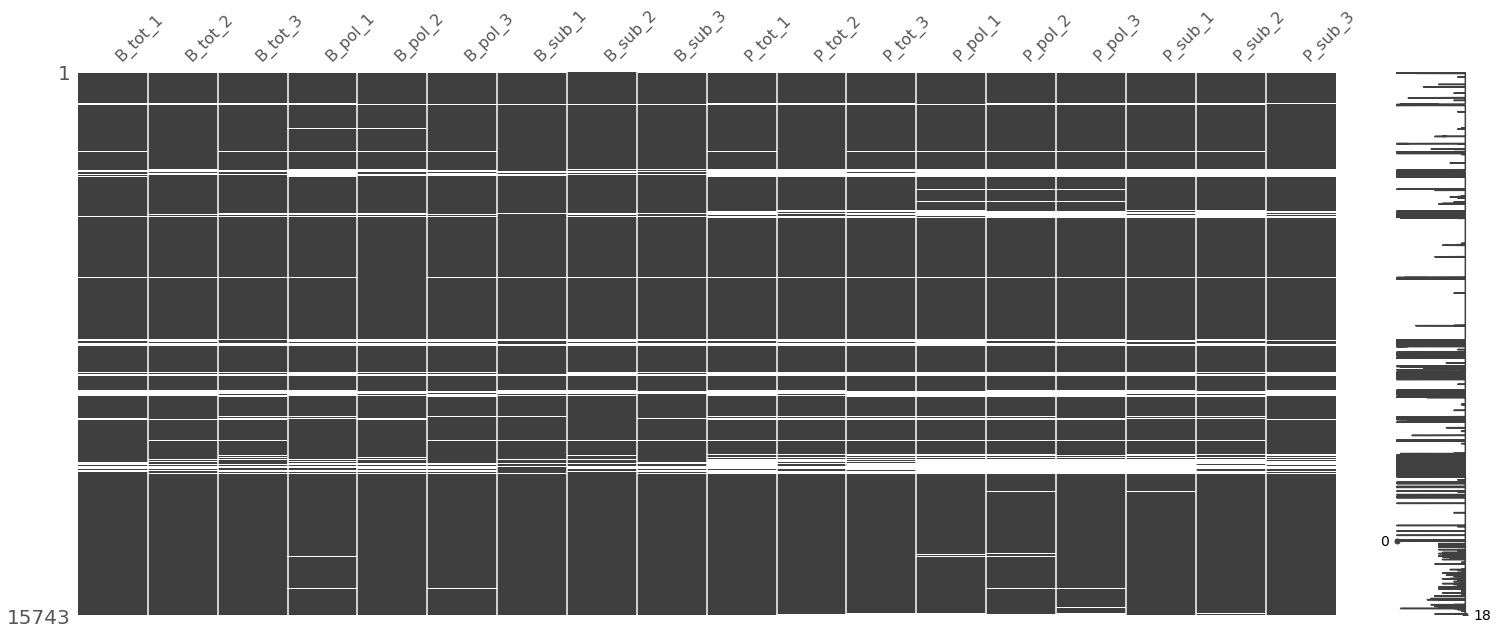

In [12]:
msno.matrix(indata.replace(0,np.nan))

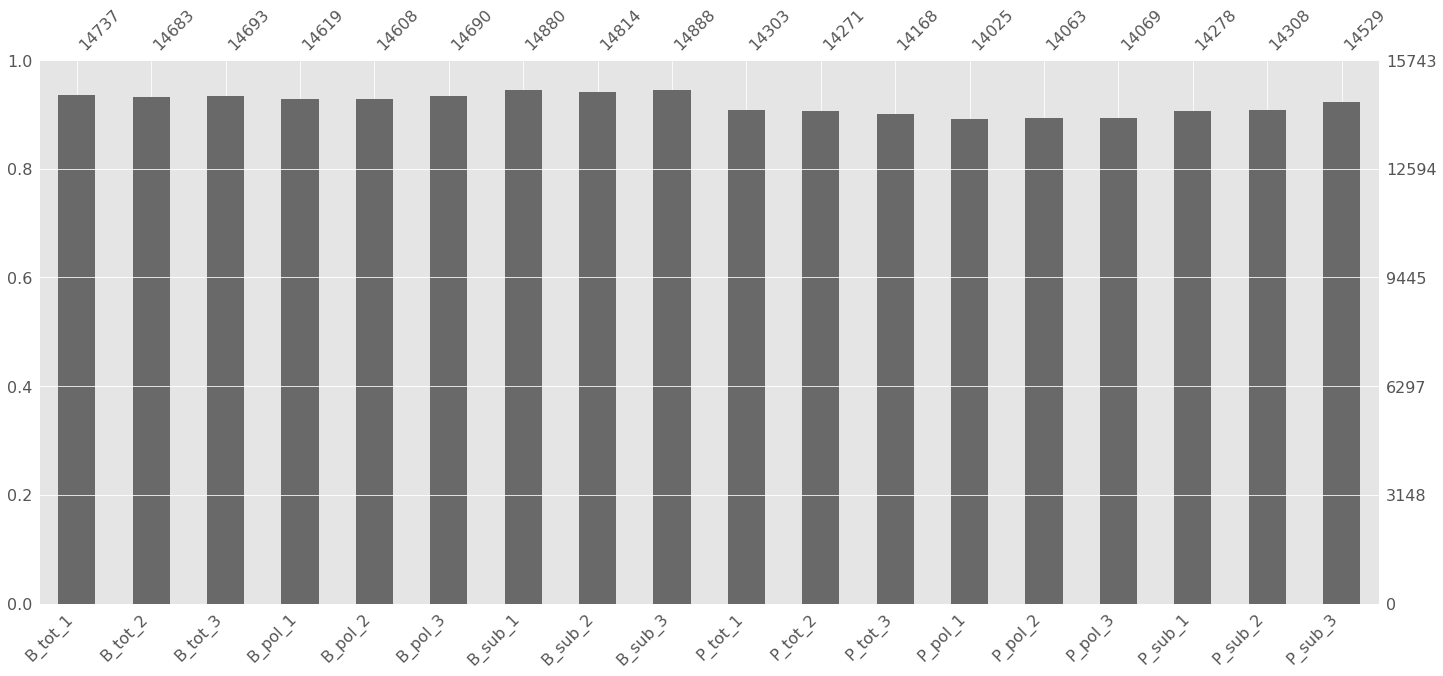

In [14]:
msno.bar(indata.replace(0,np.nan))

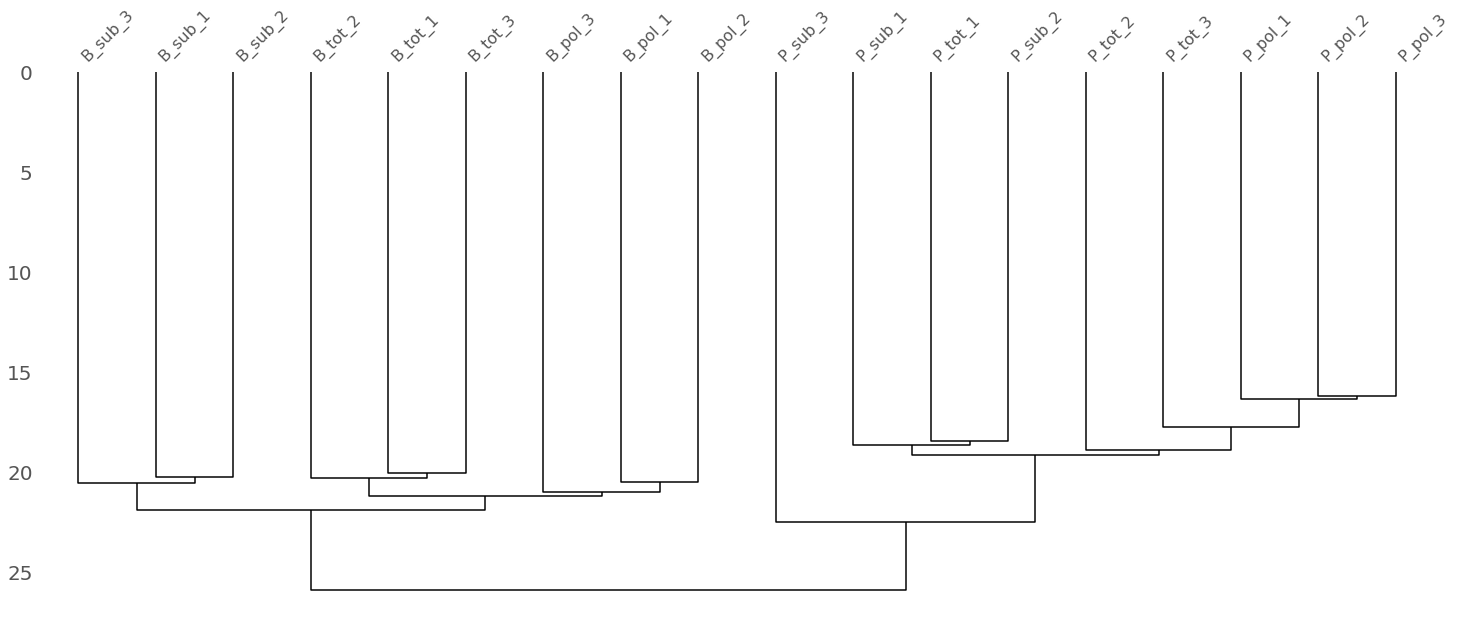

In [15]:
msno.dendrogram(indata.replace(0,np.nan))

## QC - Corr analysis

In [ ]:
fig,ax=plt.subplots(figsize=(14,12))
cbar_ax = fig.add_axes([.91, .6, .03, .2])
sns.heatmap(np.log2(indata).corr(),
            #vmin=-1,
            cmap='coolwarm',
            annot=True,linewidths=.5,ax=ax, cbar_ax = cbar_ax, cbar=True)
print(ax.get_ylim())
ax.set_ylim(18,0.1)
plt.savefig('Figures/Figure_2.png')
plt.show()

## QC - MSD

In [ ]:
plt.style.use('ggplot')
palette = ['r']*9+['b']*9
fig,ax = plt.subplots(figsize=(8,8), ncols=1, nrows=1)
UT.make_mds(np.log2(indata),palette,ax,color_dictionary={'r':'BSF','b':'PCF'})
plt.savefig('Figures/Figure_3.png')
plt.show()

## Compute Length and GC content

In [ ]:
def get_gene_ids(n):
    res = {}
    temp = n.split(';')
    temp =[n.strip() for n in temp if len(n)>2]
    for f in temp:
        key = f.split(' ')[0]
        value = f.split(' ')[1]
        key=key.replace('\"','').replace('\'','').strip()
        value=value.replace('\"','').replace('\'','').strip()
        res[key]=value
    return res['gene_id']

In [ ]:
gc_content = pd.read_csv('InData/GC_content_927.txt',sep='\t')
gc_content = gc_content[gc_content['8_usercol']=='transcript']
gc_content['gene_id'] = [get_gene_ids(n) for n in gc_content['10_usercol']]
gc_content = gc_content.drop_duplicates('gene_id')
gc_content.set_index('gene_id',inplace=True)
gc_content=gc_content[['19_seq_len','12_pct_gc']]
gc_content.columns = ['length', 'gccontent']
gc_content.head()

In [ ]:
print(indata.shape)
indata=indata.join(gc_content,how='inner')
gc_content = gc_content[['length', 'gccontent']]
indata.drop(['length', 'gccontent'],axis=1,inplace=True) 
indata.head()

## Literature Comparison

In [ ]:
scale_rpkm = indata.sum()/1000000
indata_rpkm = indata.divide(scale_rpkm,axis=1)
indata_rpkm=indata_rpkm.join(gc_content,how='left')
indata_rpkm.head()

In [ ]:
length = indata_rpkm['length']
indata_rpkm.drop(['length','gccontent'],inplace=True,axis=1)
indata_rpkm=indata_rpkm.divide(length/1000,axis=0)
indata_rpkm.head()

In [ ]:
indata_rpkm['B_tot'] = indata_rpkm[['B_tot_1','B_tot_2','B_tot_3']].median(axis=1)
indata_rpkm['P_tot'] = indata_rpkm[['P_tot_1','P_tot_2','P_tot_3']].median(axis=1)
indata_rpkm['B_sub'] = indata_rpkm[['B_sub_1','B_sub_2','B_sub_3']].median(axis=1)
indata_rpkm['P_sub'] = indata_rpkm[['P_sub_1','P_sub_2','P_sub_3']].median(axis=1)
indata_rpkm['B_pol'] = indata_rpkm[['B_pol_1','B_pol_2','B_pol_3']].median(axis=1)
indata_rpkm['P_pol'] = indata_rpkm[['P_pol_1','P_pol_2','P_pol_3']].median(axis=1)
#indata_rpkm = indata_rpkm[['B_tot','B_sub','B_pol','P_tot','P_sub','P_pol']]

### Load TryTripDB dataset

In [ ]:
trypdb =pd.read_csv('InData/RNA_dataset.txt',sep='\t')
trypdb.columns = list(trypdb.columns[0:5])+['PCF1','BSF1','PCF2','BSF2','BSF3','PCF3','BSF4','drop']
trypdb.drop(['drop','Organism'],axis=1,inplace=True)
trypdb.set_index('Gene ID',inplace=True)
trypdb=trypdb.join(indata_rpkm,how='inner')
print(trypdb.shape)
trypdb.head()

In [ ]:
trypdb.iloc[:,3:]=np.log10(trypdb.iloc[:,3:])
trypdb=trypdb.replace(np.inf,np.nan).replace(-np.inf,np.nan).dropna()
print(trypdb.shape)
trypdb.head()

### plots

In [ ]:
plt.style.use('ggplot')
fig,axes=plt.subplots(ncols=3,nrows=2,figsize=(12,8))
x='BSF1'
y='BSF2'
ax=axes[0,0]
trypdb.plot(kind='scatter',x=x,y=y,alpha=0.1,ax=ax)
UT.plot_line(trypdb[x], trypdb[y], ax, limits=(0,4))

ax=axes[0,1]
x='BSF1'
y='BSF3'
trypdb.plot(kind='scatter',x=x,y=y,alpha=0.1,ax=ax)
UT.plot_line(trypdb[x], trypdb[y], ax, limits=(0,4))

ax=axes[0,2]
x='BSF1'
y='BSF4'
trypdb.plot(kind='scatter',x=x,y=y,alpha=0.1,ax=ax)
UT.plot_line(trypdb[x], trypdb[y], ax, limits=(0,4))

ax=axes[1,0]
x='BSF2'
y='BSF3'
trypdb.plot(kind='scatter',x=x,y=y,alpha=0.1,ax=ax)
UT.plot_line(trypdb[x], trypdb[y], ax, limits=(0,4))

ax=axes[1,1]
x='BSF2'
y='BSF4'
trypdb.plot(kind='scatter',x=x,y=y,alpha=0.1,ax=ax)
UT.plot_line(trypdb[x], trypdb[y], ax, limits=(0,4))

ax=axes[1,2]
x='BSF3'
y='BSF4'
trypdb.plot(kind='scatter',x=x,y=y,alpha=0.1,ax=ax)
UT.plot_line(trypdb[x], trypdb[y], ax, limits=(0,4))
plt.tight_layout()
plt.savefig('Figures/Figure_8.png')

In [ ]:
plt.style.use('ggplot')
fig,axes=plt.subplots(ncols=3,nrows=1,figsize=(12,4))

ax=axes[0]
x='PCF1'
y='PCF2'
trypdb.plot(kind='scatter',x=x,y=y,alpha=0.1,ax=ax)
UT.plot_line(trypdb[x], trypdb[y], ax, limits=(0,4))

ax=axes[1]
x='PCF1'
y='PCF3'
trypdb.plot(kind='scatter',x=x,y=y,alpha=0.1,ax=ax)
UT.plot_line(trypdb[x], trypdb[y], ax, limits=(0,4))

ax=axes[2]
x='PCF2'
y='PCF3'
trypdb.plot(kind='scatter',x=x,y=y,alpha=0.1,ax=ax)
UT.plot_line(trypdb[x], trypdb[y], ax, limits=(0,4))
plt.tight_layout()
plt.savefig('Figures/Figure_9.png')

In [ ]:

plt.style.use('ggplot')
fig,axes=plt.subplots(ncols=4,nrows=1,figsize=(16,4))

ax=axes[0]
x='B_tot_1'
y='BSF1'
trypdb.plot(kind='scatter',x=x,y=y,alpha=0.1,ax=ax)
UT.plot_line(trypdb[x], trypdb[y], ax, limits=(0,4))

ax=axes[1]
x='B_tot_1'
y='BSF2'
trypdb.plot(kind='scatter',x=x,y=y,alpha=0.1,ax=ax)
UT.plot_line(trypdb[x], trypdb[y], ax, limits=(0,4))

ax=axes[2]
x='B_tot_1'
y='BSF3'
trypdb.plot(kind='scatter',x=x,y=y,alpha=0.1,ax=ax)
UT.plot_line(trypdb[x], trypdb[y], ax, limits=(0,4))


ax=axes[3]
x='B_tot_1'
y='BSF4'
trypdb.plot(kind='scatter',x=x,y=y,alpha=0.1,ax=ax)
UT.plot_line(trypdb[x], trypdb[y], ax, limits=(0,4))


plt.tight_layout()
plt.savefig('Figures/Figure_10.png')

In [ ]:
plt.style.use('ggplot')
fig,axes=plt.subplots(ncols=3,nrows=1,figsize=(12,4))

ax=axes[0]
x='P_tot_1'
y='PCF1'
trypdb.plot(kind='scatter',x=x,y=y,alpha=0.1,ax=ax)
UT.plot_line(trypdb[x], trypdb[y], ax, limits=(0,3))


ax=axes[1]
x='P_tot_1'
y='PCF2'
trypdb.plot(kind='scatter',x=x,y=y,alpha=0.1,ax=ax)
UT.plot_line(trypdb[x], trypdb[y], ax, limits=(0,3))


ax=axes[2]
x='P_tot_1'
y='PCF3'
trypdb.plot(kind='scatter',x=x,y=y,alpha=0.1,ax=ax)
UT.plot_line(trypdb[x], trypdb[y], ax, limits=(0,3))
plt.tight_layout()
plt.savefig('Figures/Figure_11.png')

## Data Normalization

### edgeR to filter low counts

In [ ]:
%%R -i indata
options(warn=-1)
library("limma") 
library("edgeR")
head(indata)

In [ ]:
%%R
group <- factor(c(
    'Btot','Btot','Btot',
    'Bpol','Bpol','Bpol',
    'Bsub','Bsub','Bsub',
    'Ptot','Ptot','Ptot',
    'Ppol','Ppol','Ppol',
    'Psub','Psub','Psub'))

y <- DGEList(counts=indata,group=group)
keep <- filterByExpr(y)
y <- y[keep,,keep.lib.sizes=FALSE]
counts = y$counts
genes = row.names(y)

In [ ]:
%R -o counts,genes
indata = pd.DataFrame(counts,index=genes,columns=indata.columns)
indata.shape

In [ ]:
indata=indata.join(gc_content,how='inner')
indata.shape

### GC / length content

In [ ]:
gc_content = indata[['length', 'gccontent']]
indata.drop(['length', 'gccontent'],axis=1,inplace=True)
print(indata.shape,gc_content.shape)
indata.head()

### size factors

In [ ]:
sizeFactors=indata.sum()
sizeFactors = sizeFactors.values
sizeFactors

In [ ]:
#np.log2(gc_content['length']/1000).plot(kind='hist')

### Bias Correction

In [ ]:
%%R -i gc_content,indata,sizeFactors
library(cqn)
library(scales)

In [ ]:
%%R
stopifnot(all(rownames(indata) == rownames(gc_content)))
cqn.subset <- cqn(indata, lengths = gc_content$length,
                  x = gc_content$gccontent, sizeFactors = sizeFactors,
                  verbose = TRUE)

In [ ]:
%R cqn.subset

### Viz Bias

In [ ]:
%%R
cqnplot <- function(x, n = 1, col = "grey60", ylab="estimated bias effect", 
                    xlab = "", type = "l", lty = 1, ...) {
    if(class(x) != "cqn")
        stop("'x' needs to be of class 'cqn'")
    if(n == 1) {
        func <- x$func1
        grid <- x$grid1
        knots <- x$knots1
    }
    if(n == 2) {
        if(is.null(x$func2))
            stop("argument 'x' does not appear to have two smooth functions (component 'func2' is NULL)")
        func <- x$func2
        grid <- x$grid2
        knots <- x$knots2
    }
    
    
    #par(mar=c(5.1, 4.1, 4.1, 8.1), xpd=TRUE)
    matplot(replicate(ncol(func), grid), func, ylab = ylab, xlab = xlab, type = type,
            col = col, lty = lty, ...)
    
    legend("bottomleft", legend = colnames(x$counts), inset=c(1,0),
           title="Samples", lty = lty, col = col)
    rug(knots, lwd = 2)
    invisible(x)
    
}


library(repr)
#options(repr.plot.width = 10, repr.plot.height = 0.75)
# Change plot size to 4 x 3
#options(repr.plot.width=4, repr.plot.height=3)


colors <- c(
    'grey','grey','grey',
    'green','green','green',
    'blue','blue','blue',
    'grey','grey','grey',
    'green','green','green',
    'blue','blue','blue'
           )
lty =c(1,1,1,1,1,1,1,1,1,
       2,2,2,2,2,2,2,2,2)

#png("Figures/Figure_12.png")
#par(mfrow=c(1,2))
cqnplot(cqn.subset, col=colors,
        n = 1, xlab = "GC content", lty = lty,
        ylim = c(1,12), 
        

       )
#dev.off()

#ggsave('plot.png', width=8.27, height= 11.69) #A4 size in inches
#dev.off()

In [ ]:
%%R
library(repr)
#options(repr.plot.width = 12, repr.plot.height = 0.75)
# Change plot size to 4 x 3
#options(repr.plot.width=8, repr.plot.height=3)


colors <- c(
    'grey','grey','grey',
    'green','green','green',
    'blue','blue','blue',
    'grey','grey','grey',
    'green','green','green',
    'blue','blue','blue'
           )
lty =c(1,1,1,1,1,1,1,1,1,
       2,2,2,2,2,2,2,2,2)

#par(mfrow=c(1,2))
#png("Figures/Figure_13.png")
cqnplot(cqn.subset, col=colors,
        n = 2, xlab = "length", lty = lty,
        ylim = c(-5,16), 
    
       )
#dev.off()

### Bias Correction

In [ ]:
%%R
RPKM.cqn <- cqn.subset$y + cqn.subset$offset
out_table <- RPKM.cqn
head(out_table)

In [ ]:
#out_table

In [ ]:
%R -o out_table
out_table = pd.DataFrame(out_table,index=indata.index.values,columns=indata.columns)
out_table.head()

### Visualise Normalized Counts

In [ ]:
fig,axes=plt.subplots(figsize=(16,4),ncols=2)
ax = axes[0]
out_table.plot(kind='box',ax=ax,rot=90,showfliers=False)

ax = axes[1]
out_table.replace(-np.inf,-1.5).plot(kind='hist',
                                            histtype='step',
                                            bins=100,ax=ax)
UT.hist_legend(ax,'Sample')
#ax.set_xticklabels(out_df.columns, rotation=90, )
plt.show()
print(out_table.shape)

## Differential Expression Analysis

In [ ]:
%%R
library(edgeR)
# Make groups
design_with_all <- model.matrix( ~0+group )

y <- DGEList(counts=indata, 
                  lib.size = sizeFactors,
                  group = group, 
                  )

y$offset <- cqn.subset$glm.offset
# Estimate dispersion
y <- estimateGLMCommonDisp( y, design_with_all )
y <- estimateGLMTrendedDisp( y, design_with_all )
y <- estimateGLMTagwiseDisp( y, design_with_all )
# Fit counts to model
fit_all <- glmFit( y, design_with_all )
contrast_Bpol_v_Bsub <- glmLRT( fit_all, contrast=makeContrasts( groupBpol-groupBsub,
                                                                levels=design_with_all ) )

table_Bpol_v_Bsub <- topTags(contrast_Bpol_v_Bsub, n=Inf, 
                             sort.by = "none", adjust.method="BH")$table
topTags( contrast_Bpol_v_Bsub, n=5 )
head(table_Bpol_v_Bsub)

In [ ]:
%%R
contrast_Ppol_v_Psub <- glmLRT( fit_all, contrast=makeContrasts(groupPpol-groupPsub,
                                                                levels=design_with_all ) )

table_Ppol_v_Psub <- topTags(contrast_Ppol_v_Psub, n=Inf, sort.by = "none", adjust.method="BH")$table
topTags( contrast_Ppol_v_Psub, n=5 )

In [ ]:
desc_dict

In [ ]:
%R -o table_Ppol_v_Psub
table_Ppol_v_Psub['log_PValue'] = -np.log10(table_Ppol_v_Psub['PValue'])
table_Ppol_v_Psub['log_FDR'] = -np.log10(table_Ppol_v_Psub['FDR'])
table_Ppol_v_Psub['desc']=[desc_dict.get(n,'none') for n in table_Ppol_v_Psub.index.values]
table_Ppol_v_Psub.to_csv('Tables/Table_5.csv')
table_Ppol_v_Psub.head()

In [ ]:
%R -o table_Bpol_v_Bsub
table_Bpol_v_Bsub.head()
table_Bpol_v_Bsub['log_PValue'] = -np.log10(table_Bpol_v_Bsub['PValue'])
table_Bpol_v_Bsub['log_FDR'] = -np.log10(table_Bpol_v_Bsub['FDR'])

In [ ]:
table_Bpol_v_Bsub['desc']=[desc_dict.get(n,'none') for n in table_Bpol_v_Bsub.index.values]
table_Bpol_v_Bsub.head()

In [ ]:
table_Bpol_v_Bsub.to_csv('Tables/Table_4.csv')

In [ ]:
#BRP10 Tb927.8.2780
#https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5568443/
#table_Bpol_v_Bsub.loc['KS17gene_1749a'],table_Ppol_v_Psub.loc['KS17gene_1749a']

In [ ]:
#grumpy
#https://www.biorxiv.org/content/10.1101/2020.05.03.074625v1
#table_Bpol_v_Bsub.loc['KS17gene_3137a'],table_Ppol_v_Psub.loc['KS17gene_3137a']

In [ ]:
#https://journals.plos.org/plospathogens/article?id=10.1371/journal.ppat.1006279
#'Tb927.11.14220'
#table_Bpol_v_Bsub.loc['KS17gene_4295a'],table_Ppol_v_Psub.loc['KS17gene_4295a']

In [ ]:
#table_Bpol_v_Bsub.shape

### Grumpy

In [ ]:
ks_lncRNA = open('InData/GS_gene_list.txt').read().split('\n')
def grampy_VolcanoPlot(table,title,ax=False,ksgene='KS17gene_3137a',xlims=False):
    plt.style.use('ggplot')
    if not ax:
        fig,ax=plt.subplots(figsize=(12,6))
    ax.set_title(title)
    
    table.plot(x='logFC',y='log_FDR',kind='scatter',s=5,alpha=0.2,ax=ax,c='black',label='the rest')
    
    temp = [n for n in ks_lncRNA if n in table.index.values]
    table.loc[temp].plot(x='logFC',y='log_FDR',kind='scatter',s=10,alpha=1,c='b',ax=ax,
                              label='lncRNA')
    
    
    table.loc[[ksgene]].plot(y='log_FDR',x='logFC',kind='scatter',ax=ax,s=50, alpha=1
                                                   ,c='r',label='Grumpy')
    
    lgnd= ax.legend()
    lgnd.legendHandles[0]._sizes = [20]
    lgnd.legendHandles[1]._sizes = [20]
    lgnd.legendHandles[2]._sizes = [20]
    if xlims:
        ax.set_xlim(xlims[0],xlims[1])

def grampy_MAplot(table,title,ksgene='KS17gene_3137a'):
    plt.style.use('ggplot')
    fig,ax=plt.subplots(figsize=(12,6))
    ax.set_title(title)
    table.plot(x='logCPM',y='logFC',kind='scatter',s=5,alpha=0.2,ax=ax,c='black',label='the rest')
    temp = [n for n in ks_lncRNA if n in table.index.values]
    table.loc[temp].plot(x='logCPM',y='logFC',kind='scatter',s=10,alpha=1,c='b',ax=ax,
                             label='lncRNA')
    table.loc[[ksgene]].plot(y='logFC',x='logCPM',kind='scatter',ax=ax,s=50, alpha=1
                                                   ,c='r',label='Grumpy')
    lgnd= ax.legend()
    for i,n in enumerate(lgnd.legendHandles):
        n._sizes = [20]

In [ ]:
fig,axes=plt.subplots(figsize=(12,12),nrows=2)
grampy_VolcanoPlot(table_Bpol_v_Bsub,'BSF',axes[0],xlims=(-8,8))
grampy_VolcanoPlot(table_Ppol_v_Psub,'PCF',axes[1],xlims=(-8,8))
UT.set_fig_label(axes[0],'A')
UT.set_fig_label(axes[1],'B')
plt.tight_layout()
plt.savefig('Figures/Figure_19.png')

In [ ]:
fig,axes=plt.subplots(figsize=(12,12),nrows=2)
grampy_VolcanoPlot(table_Bpol_v_Bsub,'BSF',axes[0],'KS17gene_1749a')
grampy_VolcanoPlot(table_Ppol_v_Psub,'PCF',axes[1],'KS17gene_1749a')


### average subpolysome/polysome

In [ ]:
%%R
contrast_pol_v_sub <- glmLRT( fit_all, contrast=makeContrasts((groupPsub+groupBsub)/2-(groupPpol+groupBpol)/2,
                                                                levels=design_with_all ) )

table_pol_v_sub <- topTags(contrast_pol_v_sub, n=Inf, sort.by = "none", adjust.method="BH")$table
topTags( contrast_pol_v_sub, n=20 )
#head(contrast_pol_v_sub)

In [ ]:
%R -o table_pol_v_sub
table_pol_v_sub.head()
table_pol_v_sub['log_PValue'] = -np.log10(table_pol_v_sub['PValue'])
table_pol_v_sub['log_FDR'] = -np.log10(table_pol_v_sub['FDR'])


In [ ]:
#table_pol_v_sub.loc['KS17gene_1749a']

#### volcano

In [ ]:
grampy_VolcanoPlot(table_pol_v_sub,'SUB/POL')

#### MA

In [ ]:
grampy_MAplot(table_pol_v_sub,'SUB/POL')

In [ ]:
table_pol_v_sub.loc['KS17gene_4295a']

In [ ]:
#table_pol_v_sub.plot(kind='scatter',x='logCPM',y='logFC',alpha=0.1)

## ANOVA Like

In [ ]:
%%R
design_anova <- model.matrix(~group, data=y$samples)
fit <- glmQLFit(y, design_anova)
qlf <- glmQLFTest(fit, coef=2:6)
anova_like <- topTags(qlf, n=Inf, sort.by = "none", adjust.method="BH")$table
head(anova_like)

In [ ]:
%R -o anova_like
anova_like=anova_like[['F', 'PValue', 'FDR']]
anova_threshold = 1e-2
anova_like.shape,anova_like[anova_like['FDR']<anova_threshold].shape

In [ ]:
out_table.shape

In [ ]:
#%%R
#library(HybridMTest)
#computed but not used for now
#anova_test <- row.oneway.anova(cpm_df, group)
#FDR1 <- p.adjust(anova_test$pval, "bonferroni")

In [ ]:
#%R -o cpm_df,anova_test,FDR1,tt_Bsub_Bpol

In [ ]:
#%R length(FDR1[FDR1 < 0.01])

In [ ]:
out_df = out_table.copy()

In [ ]:
out_df.head()

## RadViz - Signature in BSF SUB

In [ ]:
#https://stackoverflow.com/questions/312443/how-do-you-split-a-list-into-evenly-sized-chunks
def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

#from cqn These values are on the log2scale.        
radviz_dataset = np.exp(out_df).copy()

radviz_dataset=radviz_dataset[anova_like['FDR']<anova_threshold]
cols = list(radviz_dataset.columns)
#group coluns in cunk of 3 to compute the mean
col_grups = chunks(cols, 3)
for g in col_grups:
    base = '_'.join(g[0].split('_')[0:2])
    radviz_dataset[base]=radviz_dataset[g].median(axis=1)

#assign each gene to the class with max count

classes = radviz_dataset.iloc[:,18:].idxmax(axis=1)
#replace = {'B_pol':0, 'B_sub':1, 'B_tot':2, 'P_pol':3, 'P_sub':4, 'P_tot':5}
#classes = classes.replace(replace)
radviz_dataset=radviz_dataset.iloc[:,18:]
radviz_dataset['classes']=classes
radviz_dataset.head()

In [ ]:
radviz_dataset.shape

### RadViz figure

In [ ]:
fig,ax=plt.subplots(figsize=(12,12))
cols = [n for n in out_df.columns if n.endswith('_mean')]
color = {'B_tot':'tab:purple','B_pol':'tab:green','B_sub':'tab:blue',
         'P_tot':'tab:brown','P_pol':'tab:red','P_sub':'tab:orange'}

radviz_dataset=radviz_dataset[['B_tot','P_tot','B_sub','P_sub','B_pol','P_pol','classes']]
rad_viz,to_plot,s = UT.radviz(radviz_dataset, 
                           'classes', color=color,ax=ax,)
plt.savefig('Figures/Figure_14.png')

## Cluster analysis

In [ ]:
#mydata = out_df.iloc[:,:18]
#min_values = []
#for col in mydata:
#    min_values.append(mydata[col][mydata[col]>0].min())
#min_values
#del mydata


cluster_dataset=np.exp(out_df.iloc[:,:18])#+min_values
cluster_dataset.head()
cluster_dataset.describe()

In [ ]:
#%R -o anova_test,FDR
cluster_dataset=out_df.iloc[:,:18]
clustergrid = sns.clustermap(cluster_dataset[anova_like['FDR']<anova_threshold].sample(frac=0.3),
                             cmap=sns.color_palette("coolwarm", 256), 
                             standard_scale=0)


### Number of clusters

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer
plt.style.use('ggplot')
X = UT.standard_scale(cluster_dataset[anova_like['FDR']<anova_threshold],0)
# Instantiate the clustering model and visualizer
model = KMeans()
fig, ax = plt.subplots(figsize=(8,8)) 
visualizer = KElbowVisualizer(model, k=(2,12),ax=ax)

visualizer.fit(X.values)        # Fit the data to the visualizer


visualizer.show(outpath="Figures/Figure_15.png")
#visualizer.show()


In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
pd.Series(kmeans.labels_).value_counts()

In [ ]:
#from sklearn.cluster import SpectralBiclustering

#clustering = SpectralBiclustering(n_clusters=5,
#assign_labels="discretize",
#random_state=0).fit(X)
#pd.Series(clustering.labels_).value_counts()

### Cluster figure

In [ ]:
#print(order)
#dict_replace = dict(zip(order,[1,2,3,4]))

In [ ]:
#res = TDdf[anova_test['FDR']<0.01]
X['label']=kmeans.labels_+1
#X['label']=X['label'].replace(dict_replace)
order = pd.Series(kmeans.labels_).value_counts().index.values

list_df = []
for n in order:
    list_df.append(X[X['label']==n+1])

final_list_df = []
for index,temp_df in enumerate(list_df):
    temp_df['label']=index+1
    final_list_df.append(temp_df)
    

X = pd.concat(final_list_df)


fig, ax = plt.subplots(figsize=(10,10))  
cbar_ax = fig.add_axes([.91, .6, .03, .2])
# Sample figsize in inches




sns.heatmap(X.iloc[:,0:-1].T.iloc[
    clustergrid.dendrogram_col.reordered_ind].T.astype(float),
            cmap=sns.color_palette("coolwarm", 3),
           ax=ax, cbar_ax = cbar_ax, cbar=True)

plt.savefig('Figures/Figure_16.png')

In [ ]:
X.sort_values(['label']).drop_duplicates('label')['label']

In [ ]:
clusters = list(X['label'].unique())
X.groupby('label').size()

In [ ]:
fig, axes = plt.subplots(figsize=(10,10),nrows=4)

for c in [1,2,3,4]:
    
    #print(c,c-1)
    b=c-1
    sns.heatmap(X[X['label']==c].iloc[:,0:-1].T.iloc[
    clustergrid.dendrogram_col.reordered_ind].T.astype(float),
    cmap=sns.color_palette("coolwarm", 3),
    ax=axes[b])



In [ ]:
ks_lncRNA = open('InData/GS_gene_list.txt').read().split('\n')
X['is_ks']=[1 if n in ks_lncRNA else 0 for n in X.index.values]
len(ks_lncRNA)
X['is_ks'].value_counts()

### Table lncRNA enrichment in clusters 


In [ ]:
from scipy import stats


#k = np.arange(5)
#N = 52 # population size
#G = 4  # number of good elements in population
#n = 5  # simple random sample size
#stats.hypergeom.pmf(k, N, G, n)

population_size = X.shape[0]

for n in [1,2,3,4]:
    sample_size = X[X['label']==n].shape[0]
    sample_sucess = X[(X['label']==n) & (X['is_ks']==1) ].shape[0]
    population_sucess = X[X['is_ks']==1].shape[0]
    #print(n, sample_sucess, sample_size, population_sucess, population_size)
    print('cluster {n}: enrichment pvalue={pval:.2e}'.format(n=n, pval =stats.hypergeom.pmf(sample_sucess, 
                                 population_size, 
                                 population_sucess, 
                                 sample_size)))
        
    #avg_value = cluster_dataset.loc[X[(X['label']==n)].index.values][
    #    ['BSF-PCF-1','BSF-PCF-2','BSF-PCF-3']].median(axis=1).median()
    #print(np.log2(avg_value))
    print('_________')

### Cluster Table

In [ ]:

X['desc']=[desc_dict.get(n,'none') for n in X.index.values]
X['H/ACA-like snoRNA']=[1 if 'H/ACA-like snoRNA' in n else 0 for n in X['desc']]
X['snoRNA']=[1 if 'snoRNA' in n else 0 for n in X.index.values]
X['Noncoding']=[1 if 'Noncoding RNA' in n else 0 for n in X['desc']]

### Table snoRNA

In [ ]:
X.groupby('label')['snoRNA','H/ACA-like snoRNA','is_ks'].sum()

In [ ]:
X.to_csv('Tables/Table_1.csv')

In [ ]:
for n in [1,2,3,4]:
    sample_size = X[X['label']==n].shape[0]
    sample_sucess = X[(X['label']==n) & (X['H/ACA-like snoRNA']==1) ].shape[0]
    population_sucess = X[X['H/ACA-like snoRNA']==1].shape[0]
    #print(n, sample_sucess, sample_size, population_sucess, population_size)
    print('cluster {n}: enrichment pvalue={pval:.2e}'.format(n=n, pval =stats.hypergeom.pmf(sample_sucess, 
                                 population_size, 
                                 population_sucess, 
                                 sample_size)))
        
    #avg_value = cluster_dataset.loc[X[(X['label']==n)].index.values][
    #    ['BSF-PCF-1','BSF-PCF-2','BSF-PCF-3']].median(axis=1).median()
    #print(np.log2(avg_value))
    print('_________')

In [ ]:
for n in [1,2,3,4]:
    sample_size = X[X['label']==n].shape[0]
    sample_sucess = X[(X['label']==n) & (X['snoRNA']==1) ].shape[0]
    population_sucess = X[X['snoRNA']==1].shape[0]
    #print(n, sample_sucess, sample_size, population_sucess, population_size)
    print('cluster {n}: enrichment pvalue={pval:.2e}'.format(n=n, pval =stats.hypergeom.pmf(sample_sucess, 
                                 population_size, 
                                 population_sucess, 
                                 sample_size)))
        
    #avg_value = cluster_dataset.loc[X[(X['label']==n)].index.values][
    #    ['BSF-PCF-1','BSF-PCF-2','BSF-PCF-3']].median(axis=1).median()
    #print(np.log2(avg_value))
    print('_________')

In [ ]:
for n in [1,2,3,4]:
    sample_size = X[X['label']==n].shape[0]
    sample_sucess = X[(X['label']==n) & (X['Noncoding']==1) ].shape[0]
    population_sucess = X[X['Noncoding']==1].shape[0]
    #print(n, sample_sucess, sample_size, population_sucess, population_size)
    print('cluster {n}: enrichment pvalue={pval:.2e}'.format(n=n, pval =stats.hypergeom.pmf(sample_sucess, 
                                 population_size, 
                                 population_sucess, 
                                 sample_size)))
        
    #avg_value = cluster_dataset.loc[X[(X['label']==n)].index.values][
    #    ['BSF-PCF-1','BSF-PCF-2','BSF-PCF-3']].median(axis=1).median()
    #print(np.log2(avg_value))
    print('_________')

## GO term Analysis

In [ ]:
from goatools.base import download_go_basic_obo
from goatools.associations import read_associations
from goatools.go_enrichment import GOEnrichmentStudy
from goatools.obo_parser import GODag
from goatools.associations import read_gaf

### Fix gaf file

In [ ]:
import tqdm
replace_dict = {'P':'BP','F':'MF','C':'CC'}
def pars_trytripDB_gaf(infile):
    new_file = open(infile.replace('.gaf','2.gaf'),'w')
    for l in tqdm.tqdm(open(infile)):
        if l.startswith('!'):
            #new_file.write(l)
            continue
        else:    
            temp_list = l.split('\t')
            code = l.split('\t')[8]
            if code not in  replace_dict:
                continue
            temp_list[8] = replace_dict[code]
            new_file.write(temp_list[1]+'\t'+temp_list[4]+'\n')
    new_file.close()

pars_trytripDB_gaf('InData/TriTrypDB-46_TbruceiTREU927_GO.gaf')    

In [ ]:
obo_fname = download_go_basic_obo()
in_go=os.path.join('InData/go-basic.obo')
obodag = GODag(in_go)
geneid2gos = read_associations('InData/TriTrypDB-46_TbruceiTREU927_GO2.gaf')

In [ ]:
out_df.shape,X.shape

In [ ]:
all_genes = out_df.index.values
print(len(all_genes))
goeaobj = GOEnrichmentStudy(
            list(all_genes), # List of mouse protein-coding genes
            geneid2gos, # geneid/GO associations
            obodag, # Ontologies
            propagate_counts = False,
            alpha = 0.05, # default significance cut-off
            methods = ['fdr_bh'])

In [ ]:
all_res = []
def analysis(data, cluster_id=0):
    geneids_study =  list(data[(data['label']==cluster_id)].index.values)
    geneids_study = [n for n in geneids_study if n in all_genes]
    goea_results_all = goeaobj.run_study(geneids_study)
    goea_results_sig = [r for r in goea_results_all if r.p_fdr_bh < 0.01]
    for item in goea_results_sig:
        item_list = str(item).split('\t')
        #print(item_list)
        tempres = [str(cluster_id), item_list[0], str(item_list[6]), item_list[1], item_list[3], item_list[4]]
        all_res.append('\t'.join(tempres))

for n in [1,2,3,4]:
    print(n,'_________________')
    analysis(X, cluster_id=n)

print(len(all_res))    
go_term_res = open('InData/goterm_enrich.txt','w')
go_term_res.write('\n'.join(all_res))
go_term_res.close()

In [ ]:
#pd.read_csv??

In [ ]:
go_terms = pd.read_csv('InData/goterm_enrich.txt', sep='\t', header=None)
go_terms.columns = ['clusterID','goID','pvalue','goType','goDesc','found']
go_terms['found']=[int(n.split('/')[0]) for n in go_terms['found']]
go_terms['clusterID'] = ['C'+str(n) for n in go_terms['clusterID']]
print(go_terms.shape)
go_terms = go_terms[go_terms['found']>=2]
print(go_terms.shape)
del go_terms['found']
go_terms.head()

In [ ]:
go_terms['clusterID'].value_counts()

In [ ]:
unique_go = go_terms.goID.value_counts()[go_terms.goID.value_counts()<=3].index.values
go_terms = go_terms[go_terms.goID.isin(unique_go)]
go_terms.head()

In [ ]:
go_terms['clusterID'].value_counts()

In [ ]:
go_terms = go_terms[go_terms['clusterID']!='C1']

In [ ]:
#vizGo = pd.pivot_table(go_terms, index='goID',columns['clusterID'])#.reset_index()
vizGo = pd.pivot_table(go_terms, index='goDesc', columns=['clusterID'])
vizGo = -np.log10(vizGo)
vizGo=vizGo.fillna(0)
print(vizGo.head())
vizGo.columns = ['C2','C3','C4']
vizGo =vizGo.sort_values(['C2','C3','C4'])
vizGo.head()

In [ ]:
vizGo.tail()

### GO term Figure

In [ ]:
#del vizGo['C1']
fig, ax = plt.subplots(figsize=(12,6))  
cbar_ax = fig.add_axes([1, .1, .03, .2])
# Sample figsize in inches
sns.heatmap(vizGo,
            cmap=sns.color_palette("Blues", 128),
           ax=ax, cbar_ax = cbar_ax, cbar=True)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_title('GO Terms Enrichment')
print(ax.get_ylim())
ax.set_ylim(ax.get_ylim()[0]+0.5, 0)
plt.tight_layout()
plt.savefig('Figures/Figure_17.png')
plt.show()

### GO enrichment

In [ ]:
np.log10(0.01)

In [ ]:
Bsub_genes = table_Bpol_v_Bsub[ (table_Bpol_v_Bsub['log_FDR']>2) & (table_Bpol_v_Bsub['logFC']<-2)]
geneids_study =  Bsub_genes.index.values
geneids_study = [n for n in geneids_study if n in all_genes]
goea_results_all = goeaobj.run_study(geneids_study)
goea_results_sig = [r for r in goea_results_all if r.p_fdr_bh < 0.01]
for item in goea_results_sig:
    item_list = str(item).split('\t')
    print(item_list[0], str(item_list[6]), item_list[1],  item_list[4], item_list[5],item_list[3])

In [ ]:
Psub_genes = table_Ppol_v_Psub[ (table_Ppol_v_Psub['log_FDR']>2) & (table_Ppol_v_Psub['logFC']<-2)]
geneids_study =  Psub_genes.index.values
geneids_study = [n for n in geneids_study if n in all_genes]
goea_results_all = goeaobj.run_study(geneids_study)
goea_results_sig = [r for r in goea_results_all if r.p_fdr_bh < 0.01]
for item in goea_results_sig:
    item_list = str(item).split('\t')
    print(item_list[0], str(item_list[6]), item_list[1],  item_list[4], item_list[5],item_list[3],)

## mRNA Half Life

In [ ]:
pcf_hl = pd.read_csv('InData/mRNA_Half_Life/mrnaPCFhl.txt',sep='\t',index_col=[0])
bsf_hl = pd.read_csv('InData/mRNA_Half_Life/mrnaBSFhl.txt',sep='\t',index_col=[0])
hl = pcf_hl.join(bsf_hl,how='outer')
hl=hl.reset_index()
hl_lookup = pd.read_csv('InData/mRNA_Half_Life//mRNAhl_lookup.txt',sep='\t',index_col=[0])
hl_df = hl_lookup.merge(hl,left_on='Input ID',right_on='Gene_ID',how='outer')
hl_df.set_index('Gene_ID',inplace=True)
hl_df=hl_df.join(X,how='left')
del hl_df['Unnamed: 6']
#hl_df['hl_dif']=hl_df['BSF_half-life']/hl_df['PCF_half-life']
hl_df.head()

In [ ]:
#for col in ['PCF_half-life','BSF_half-life']:
#    col_zscore = col + '_zscore'
#    hl_df[col_zscore] =((hl_df[col] - hl_df[col].mean())/hl_df[col].std(ddof=0)).values

#hl_df['hl_dif_zscore']=hl_df['BSF_half-life_zscore']-hl_df['PCF_half-life_zscore']    
#hl_df.groupby('label')[['PCF_half-life_zscore','BSF_half-life_zscore','hl_dif_zscore']].mean()

### Table mRNA half life

In [ ]:
hl_df['hl_dif']=hl_df['BSF_half-life']/hl_df['PCF_half-life']    
hl_df.groupby('label')[['PCF_half-life','BSF_half-life','hl_dif']].median().sort_values('hl_dif')

In [ ]:
temp1 = hl_df[['BSF_half-life','label']]
temp1.columns = ['half-life','cluster']
temp1['life_stage']='BSF'
temp2 = hl_df[['PCF_half-life','label']]
temp2.columns = ['half-life','cluster']
temp2['life_stage']='PCF'
dataset_hl = pd.concat([temp1,temp2])

fig, ax = plt.subplots(figsize=(10,5))  
sns.boxplot(data=dataset_hl,x='cluster',
            y='half-life',hue='life_stage',
            showfliers=False,ax=ax)
plt.savefig('Figures/Figure_18.png')
plt.show()

In [ ]:
dataset_hl.groupby(['cluster','life_stage'])['half-life'].mean().sort_values()

## Protein Abundance Regression

### Load iBAQ values

In [ ]:
list_pro = []
bsf_pro = pd.read_csv('InData/Proteomics/proteinGroups_BSF.zip',sep='\t')
bsf_pro = UT.clean_df(bsf_pro)
bsf_pro['gene_ids'] = [UT.clean_id(n) for n in bsf_pro['Protein IDs']]
bsf_pro = bsf_pro[['gene_ids','iBAQ H']]
bsf_pro.columns = ['gene_ids','iBAQ BSF']
bsf_pro.set_index('gene_ids',inplace=True)
list_pro.append(bsf_pro)

pcf_pro = pd.read_csv('InData/Proteomics/proteinGroups_PCF.zip',sep='\t')
pcf_pro = UT.clean_df(pcf_pro)
pcf_pro['gene_ids'] = [UT.clean_id(n) for n in pcf_pro['Protein IDs']]
pcf_pro = pcf_pro[['gene_ids','iBAQ H']]
pcf_pro.columns = ['gene_ids','iBAQ PCF']
pcf_pro.set_index('gene_ids',inplace=True)
list_pro.append(pcf_pro)

proteomic_df = pd.concat(list_pro,axis=1)
#proteomic_df = np.log10(proteomic_df)
proteomic_df.head()

### Load mRNA features

In [ ]:
gene_df = cluster_dataset.copy()
gene_df['bsf_tot'] = np.log10(gene_df[['B_tot_1','B_tot_2','B_tot_3']].median(axis=1))
gene_df['pcf_tot'] = np.log10(gene_df[['P_tot_1','P_tot_2','P_tot_3']].median(axis=1))

gene_df['bsf_TC'] = np.log2(gene_df[['B_pol_1','B_pol_2','B_pol_3']].median(axis=1)/
                         gene_df[['B_sub_1','B_sub_2','B_sub_3']].median(axis=1) )

gene_df['pcf_TC'] = np.log2(gene_df[['P_pol_1','P_pol_2','P_pol_3']].median(axis=1)/
                         gene_df[['P_sub_1','P_sub_2','P_sub_3']].median(axis=1) )


gene_df['bsf_SUB'] = np.log10(gene_df[['B_sub_1','B_sub_2','B_sub_3']].median(axis=1))

gene_df['pcf_SUB'] = np.log10(gene_df[['P_sub_1','P_sub_2','P_sub_3']].median(axis=1))


gene_df = gene_df[['bsf_tot','pcf_tot','bsf_TC','pcf_TC','bsf_SUB','pcf_SUB']]
proteomic_df = proteomic_df.join(gene_df,how='left')
proteomic_df.head()

In [ ]:
proteomic_df = proteomic_df.join(hl_df[['PCF_half-life','BSF_half-life']],how='left')
proteomic_df.head()

### Load Protein half-life

In [ ]:
list_turn = []
bsf_turn = pd.read_csv('InData/Proteomics/Table 2.csv')
bsf_turn.set_index('protein_id',inplace=True)
bsf_turn = bsf_turn[['half_life']]
bsf_turn.columns = ['BSF_half_life_p']
list_turn.append(bsf_turn[['BSF_half_life_p']])

pcf_turn = pd.read_csv('InData/Proteomics/Table 3.csv')
pcf_turn.set_index('protein_id',inplace=True)
pcf_turn = pcf_turn[['half_life']]
pcf_turn.columns = ['PCF_half_life_p']
list_turn.append(pcf_turn[['PCF_half_life_p']])
turn_df = pd.concat(list_turn,axis=1)
turn_df.head()

In [ ]:
proteomic_df = proteomic_df.join(turn_df,how='left')
proteomic_df.head()

### Assemble Dataset

In [ ]:
#ml_bsf.head()

In [ ]:
ml_bsf = proteomic_df[['iBAQ BSF','bsf_tot','bsf_TC','BSF_half-life','BSF_half_life_p','bsf_SUB']]
ml_bsf.columns = ['ibaq_bsf','mRNA_bsf','TC_bsf','mRNA_hl_bsf','Prot_hl_bsf','SUB_bsf']
ml_bsf['Prot_hl_bsf']=np.log10(ml_bsf['Prot_hl_bsf']*60)
ml_bsf['mRNA_hl_bsf']=np.log10(ml_bsf['mRNA_hl_bsf'])
ml_bsf['ibaq_bsf'] = np.log10(ml_bsf['ibaq_bsf'])

ml_pcf = proteomic_df[['iBAQ PCF','pcf_tot','pcf_TC','PCF_half-life','PCF_half_life_p','pcf_SUB']]
ml_pcf.columns = ['ibaq_pcf','mRNA_pcf','TC_pcf','mRNA_hl_pcf','Prot_hl_pcf','SUB_pcf']
ml_pcf['Prot_hl_pcf']=np.log10(ml_pcf['Prot_hl_pcf']*60)
ml_pcf['ibaq_pcf'] = np.log10(ml_pcf['ibaq_pcf'])
ml_pcf['mRNA_hl_pcf']=np.log10(ml_pcf['mRNA_hl_pcf'])

ml_df=pd.concat([ml_bsf,ml_pcf],axis=1)
#print(ml_df.shape)
#ml_df=ml_df.dropna()#.replace(-np.inf, np.nan).replace(np.inf, np.nan).fillna(ml_df.mean())
print(ml_df.shape)
ml_df.head()
del ml_df['SUB_pcf']
del ml_df['SUB_bsf']
#ml_df.drop(['mRNA_bsf','mRNA_pcf'],axis=1,inplace=True)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import scipy as sp
#test=test.dropna()
def plot_line(x,y,ax):
    linreg = sp.stats.linregress(x, y)
    ax.plot(x, linreg.slope*x + linreg.intercept,alpha=0.5)
    ax.text(0.1, 0.8, 'r2='+str(round(linreg.rvalue,2)), 
                               horizontalalignment='center',
               verticalalignment='center',
               transform=ax.transAxes,fontsize=16)

### BSF and PCF models

In [ ]:
regr_bsf = RandomForestRegressor(max_depth=5, random_state=0,
                             min_samples_split=20,
                             min_samples_leaf=10,
                            criterion='mse')



X = ml_df.copy()
X = X[[n for n in X.columns if 'bsf' in n]]
X=X.dropna()
print(X.shape)

y=X['ibaq_bsf']
X=X.drop(['ibaq_bsf'],axis=1)
X.columns = [n.replace('_bsf','') for n in X.columns]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.5, 
                                                    random_state =1976)
regr_bsf.fit(X_train, y_train)
y_pred = regr_bsf.predict(X_test)


fig,axes=plt.subplots(figsize=(14,6),ncols=2)


ax=axes[1]
ax.plot(y_test,y_pred,'b.')
plot_line(y_test,y_pred,ax)

ax.set_xlabel('iBAQ')
ax.set_ylabel('Prediction')
ax.set_title('BSF')



regr_pcf = RandomForestRegressor(max_depth=5, random_state=0,
                             min_samples_split=20,
                             min_samples_leaf=10,
                            criterion='mse')

from sklearn.tree import DecisionTreeRegressor
#regr_pcf = DecisionTreeRegressor(random_state=0)

X = ml_df.copy()
X = X[[n for n in X.columns if 'pcf' in n]]
X=X.dropna()
print(X.shape)

y=X['ibaq_pcf']
X=X.drop(['ibaq_pcf'],axis=1)
X.columns = [n.replace('_pcf','') for n in X.columns]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.5, 
                                                    random_state =1976)
regr_pcf.fit(X_train, y_train)
y_pred = regr_pcf.predict(X_test)

ax=axes[0]
ax.plot(y_test,y_pred,'b.')
plot_line(y_test,y_pred,ax)
ax.set_xlabel('iBAQ')
ax.set_ylabel('Prediction')
ax.set_title('PCF')

UT.set_fig_label(axes[0],'A')
UT.set_fig_label(axes[1],'B')

plt.savefig('Figures/Figure_23.png')
plt.show()





### BSF Feature Importance

In [ ]:
#X = ml_df.copy()
#X = X[[n for n in X.columns if 'bsf' in n]]
#X_test_p.columns

In [ ]:
#import shap


regr_bsf = RandomForestRegressor(max_depth=5, random_state=0,
                             min_samples_split=20,
                             min_samples_leaf=10,
                             criterion='mse')



X = ml_df.copy()
X = X[[n for n in X.columns if 'bsf' in n]]
X=X.dropna()
print(X.shape)

y=X['ibaq_bsf']
X=X.drop(['ibaq_bsf'],axis=1)
X.columns = [n.replace('_bsf','') for n in X.columns]

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state =1976)
regr_bsf.fit(X_train_b, y_train_b)
print(X.columns)
print(X_train_b.columns)
print(X_test_b.columns)


#explainer_bsf = shap.TreeExplainer(regr_bsf)
#shap_values_bsf = explainer_bsf.shap_values(X_train_b)
#shap.summary_plot(shap_values_bsf, X_train_b,show=False)
#f = plt.gcf()
#f.set_size_inches(12,6)
#plt.title('BSF',fontsize=16)
#plt.savefig('Fig13.png')

from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer
from sklearn.inspection import permutation_importance
 
result = permutation_importance(regr_bsf, X_test_b, y_test_b, 
                                n_repeats=50, random_state=0,scoring=make_scorer(r2_score))
print(result.importances_mean)
bsf_importance = pd.DataFrame(result.importances,index=X_test_b.columns)

fig,ax=plt.subplots()
bsf_importance.T.plot(kind='box',ax=ax)
plt.savefig('Figures/Figure_24.png')

### PCF feature importance

In [ ]:
#import shap


regr_pcf = RandomForestRegressor(max_depth=5, random_state=0,
                             min_samples_split=20,
                             min_samples_leaf=10,
                            criterion='mse')



X = ml_df.copy()
X = X[[n for n in X.columns if 'pcf' in n]]
X=X.dropna()
X = X[X['TC_pcf']>-1]
print(X.shape)

y=X['ibaq_pcf']
X=X.drop(['ibaq_pcf'],axis=1)
X.columns = [n.replace('_pcf','') for n in X.columns]


X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state =1976)
regr_pcf.fit(X_train_p, y_train_p)




#explainer_pcf = shap.TreeExplainer(regr_pcf)
#shap_values_pcf = explainer_bsf.shap_values(X_train_p)
#shap.summary_plot(shap_values_pcf, X_train_p,show=False)
#f = plt.gcf()
#f.set_size_inches(12,6)
#plt.title('PCF',fontsize=16)
#plt.savefig('Fig14.png')


#features = list(X.columns)
#importances = regr_pcf.feature_importances_
#indices = np.argsort(importances)
#plt.title('PCF')
#plt.barh(range(len(indices)), importances[indices], color='b', align='center')
#plt.yticks(range(len(indices)), [features[i] for i in indices])
#plt.xlabel('Relative Importance')
#plt.show()

result = permutation_importance(regr_pcf, X_test_p, y_test_p, n_repeats=50, random_state=0,
                                scoring=make_scorer(r2_score))
print(result.importances_mean)
pcf_importance = pd.DataFrame(result.importances,index=X_test_p.columns)

fig,ax=plt.subplots()
pcf_importance.T.plot(kind='box',ax=ax)
plt.savefig('Figures/Figure_25.png')

In [ ]:
#infile='proteomics/CDS/peptides.zip'
#bsf_cds_pep = pd.read_csv(infile,sep='\t')


In [ ]:
#bsf_cds_pep['Proteins'] =bsf_cds_pep['Proteins'].astype(str)
#bsf_cds_pep['name'] = [n.split(';')[0] for n in bsf_cds_pep['Proteins']]




## Finding new protein coding genes

In [ ]:
!gtf2bed < 'InData/tb927_3_ks_st_sc_st_tr.gtf' > 'tb927_3_ks_st_sc_st_tr.bed'
!sort-bed < 'tb927_3_ks_st_sc_st_tr.bed' - > 'tb927_3_ks_st_sc_st_tr_sorted.bed'
outfile = open('tb927_3_ks_st_sc_st_tr_sorted_filter.bed','w')
for line in open('tb927_3_ks_st_sc_st_tr_sorted.bed'):
    if 'KS17' in line:
        outfile.write(line)
    elif 'MSTRG' in line:
        outfile.write(line)
    elif 'TRY.' in line:
        outfile.write(line)
    else:
        pass
outfile.close()

### process proteomics

In [ ]:
def process_peps(infile='proteomics/CDS/peptides.zip'):
    bsf_cds_pep = pd.read_csv(infile,sep='\t', usecols=
                              ['Proteins','Reverse','Potential contaminant',
                              'Start position', 'Sequence', 'End position'])
    bsf_cds_pep['Proteins'] =bsf_cds_pep['Proteins'].astype(str)
    bsf_cds_pep['Reverse'] = bsf_cds_pep['Reverse'].astype(str)
    bsf_cds_pep = bsf_cds_pep[bsf_cds_pep['Reverse'] != '+' ]
    bsf_cds_pep['Potential contaminant'] = bsf_cds_pep['Potential contaminant'].astype(str)
    bsf_cds_pep = bsf_cds_pep[bsf_cds_pep['Potential contaminant'] != '+' ]
    del bsf_cds_pep['Potential contaminant']
    bsf_cds_pep['my_name'] = [n.split(';')[0] for n in bsf_cds_pep['Proteins']]
    bsf_cds_pep['my_chro'] = [n.split('-')[0] for n in bsf_cds_pep['my_name']]
    bsf_cds_pep['my_frame'] = [n.split('-')[1] for n in bsf_cds_pep['my_name']]
    bsf_cds_pep['my_start'] = [n.split('-')[2] for n in bsf_cds_pep['my_name']]
    bsf_cds_pep['my_end'] = [n.split('-')[3] for n in bsf_cds_pep['my_name']]

    bsf_cds_pep['my_start']=bsf_cds_pep['my_start'].astype(int)
    bsf_cds_pep['my_end']=bsf_cds_pep['my_end'].astype(int)

    bsf_cds_pep['dif'] = bsf_cds_pep['my_start']-bsf_cds_pep['my_end']
    bsf_cds_pep['new_start'] = bsf_cds_pep[['my_start','my_end']].min(axis=1).astype(int)
    bsf_cds_pep['new_end'] = bsf_cds_pep[['my_start','my_end']].max(axis=1).astype(int)
    return bsf_cds_pep

bsf_cds_pep =  process_peps(infile='InData/Proteomics/peptides_bsf.zip')
pcf_cds_pep = process_peps(infile='InData/Proteomics/peptides_pcf.zip')

In [ ]:
bsf_cds_pep.head()

In [ ]:
bsf_cds_pep=pd.concat([bsf_cds_pep,pcf_cds_pep])

In [ ]:
bsf_cds_pep[['Start position','End position','Proteins','my_chro','my_start',
             'my_end','new_start','new_end','dif','my_frame','Sequence']].head()

In [ ]:
bsf_cds_pep[(bsf_cds_pep['my_chro']=='Tb927_10_v5.1')
            &(bsf_cds_pep['my_start']>2944807)
            &(bsf_cds_pep['my_end']<2945348)][['Start position','End position','Proteins','my_chro','my_start',
             'my_end','new_start','new_end','dif','my_frame','Sequence']].head()

### get peptide genomic coords

In [ ]:
#bsf_cds_pep = bk.copy()
#bsf_cds_pep = bsf_cds_pep.head(50)
starts = []
ends = []
for pep_start, pep_end, genomic_start, genomic_end, diff in zip(bsf_cds_pep['Start position'],bsf_cds_pep['End position'],
                    bsf_cds_pep['my_start'],bsf_cds_pep['my_end'],bsf_cds_pep['dif']):
    
    
    #e: difference, are in the + or - strand
    #a: start of peptide sequence in the predicted protein
    #b: end of peptide sequence in the predicted protein
    #c: genomic start of the predicted protein
    #b: genomic end of the predicted protein
    
    #the length of the predicted peptide sequence
    pep_length = abs(pep_start-pep_end)*3
    #print(pep_length)
    #we are in the reverse strand
    if diff > 0 :
        #oddities with python starting to count at 0
        #new_start = c-(b)+1
        new_start = genomic_start-(pep_start*3)+3
        new_end = new_start-pep_length-2 
        
    #we are in the forward strand
    if diff < 0 :
        #print('m here')
        new_start = genomic_start+(pep_start*3)-3
        #oddities with python starting to count at 0
        new_end = new_start + pep_length +2
        
    starts.append(new_start)
    ends.append(new_end)
    #print(a,b,c,d,e,new_start,new_end)
    
    
bsf_cds_pep['pep_start'] = starts
bsf_cds_pep['pep_end'] = ends
bsf_cds_pep['pep_start2'] = bsf_cds_pep[['pep_start','pep_end']].min(axis=1).astype(int)
bsf_cds_pep['pep_end2'] = bsf_cds_pep[['pep_start','pep_end']].max(axis=1).astype(int)


bsf_cds_pep['names']=(bsf_cds_pep['my_name']+'_'+
                      bsf_cds_pep['pep_start2'].astype(str)+'-'+
                      bsf_cds_pep['pep_end2'].astype(str)+'-'+bsf_cds_pep['Sequence']+'-bsf')


bsf_cds_pep[['Start position','End position','Proteins','my_chro','my_start',
             'my_end','new_start','new_end','dif','my_frame','Sequence',
            'pep_start','pep_end','pep_start2','pep_end2','names','dif']].head(20)



In [ ]:
bsf_cds_pep = bsf_cds_pep[['my_chro','pep_start2','pep_end2','names']]
bsf_cds_pep = bsf_cds_pep[(bsf_cds_pep['pep_start2']>0)&(bsf_cds_pep['pep_end2']>0)]
bsf_cds_pep.to_csv('pep_cds.bed', header=False, index=False,sep='\t')
bsf_cds_pep.head(5)

### Create pep track

In [ ]:
bsf_cds_pep['dummy']=1
bsf_cds_pep[['my_chro','pep_start2','pep_end2','dummy']
           ].to_csv('all_pepe.bed',index=False,header=False,sep='\t')

### find novel protein coding genes

In [ ]:
!sort-bed < 'pep_cds.bed' - > 'pep_cds_sorted.bed'

In [ ]:
!bedextract  'pep_cds_sorted.bed' tb927_3_ks_st_sc_st_tr_sorted_filter.bed > cds.filtered.bed

In [ ]:
!bedtools intersect -wo -a tb927_3_ks_st_sc_st_tr_sorted_filter.bed \
                             -b cds.filtered.bed  > cds.filtered_closest2.bed

In [ ]:
innew = pd.read_table('cds.filtered_closest2.bed',header=None)
innew.columns = [
    'chro','start','end','name','score','score2',
    'ref','gene_feature','score3','gene_ref',
    'chro2','pep_start','pep_end','pep_ref','pep_size'
]
innew=innew[innew['gene_feature']=='transcript']
print(innew.groupby('name').size().shape)
innew.groupby('name').size()

In [ ]:
main_chrs = ['Tb927_{}_v5.1'.format(c) for c in ['01','02','03','04','05','06','07','08','09','10','11']]

innew[innew['chro'].isin(main_chrs)].groupby(['chro','name']).size()

In [ ]:
print(innew[innew['chro'].isin(main_chrs)].groupby('name').size().shape)
innew[innew['chro'].isin(main_chrs)].groupby('name').size()

In [ ]:
innew['dummy']=1
innew[['chro2','pep_start','pep_end','dummy']].to_csv('new_genes.bed',index=False,header=False,sep='\t')

In [ ]:
from Bio import SeqIO
from Bio.Seq import Seq

chr_dict = {}
fasta_sequences = SeqIO.parse(open('InData/tb927_3.fasta'),'fasta')
for fasta in fasta_sequences:
    name, sequence = fasta.id, str(fasta.seq)
    chr_dict[name]=sequence
    
def get_seq(X, chr_dict):
    temp_seq = chr_dict[X['ref_chro']]
    temp_seq = temp_seq[X['ref_start']+1:X['ref_end']]
    return temp_seq


## Find closest 5'

In [ ]:
def get_gene(indata):
    indata = indata[-1].split(';')
    res = {}
    #print(indata)
    for n in indata:
        if 'gene_id' in n:
            n=n.strip()
            res[n.split(' ')[0].strip()]=n.split(' ')[1].strip('\"').strip('\'').strip()
    #print(res)
    return res['gene_id']

inbed = pd.read_csv('tb927_3_ks_st_sc_st_tr_sorted.bed',sep='\t')
inbed.columns = ['chro','start','end','gene_id','a','orient','source','ftype','e','f']
inbed=inbed[inbed['ftype']=='transcript']
inbed =inbed.reset_index()
del inbed['index']
#inbed =inbed.reset_index()
#inbed = inbed.set_index('gene_id')
inbed['gene_plus1'] = inbed['gene_id'].shift(+1)
inbed['gene_plus2'] = inbed['gene_id'].shift(+2)
inbed['orient_plus1'] = inbed['orient'].shift(+1)
inbed['orient_plus2'] = inbed['orient'].shift(+2)
inbed['gene_minus1'] = inbed['gene_id'].shift(-1)
inbed['orient_minus1'] = inbed['orient'].shift(-1)
inbed['gene_minus2'] = inbed['gene_id'].shift(-2)
inbed['orient_minus2'] = inbed['orient'].shift(-2)
inbed.head()

In [ ]:
for_list = inbed[(inbed['orient_minus1']=='+')#&
     #inbed['gene_id'].isin(common_genes)&
     #inbed['gene_minus1'].str.startswith('Tb')
                
                ][['gene_id','gene_minus1','orient_minus1']]

rev_list = inbed[(inbed['orient_plus1']=='-')#&
#      inbed['gene_id'].isin(common_genes)&
     #inbed['gene_plus1'].str.startswith('Tb')
                
                ][['gene_id','gene_plus1','orient_plus1']]
rev_list.columns = ['gene_id','reg_gene','orient']
for_list.columns = ['gene_id','reg_gene','orient']
merge_list = pd.concat([for_list,rev_list])


In [ ]:
print(merge_list.shape)
merge_list.tail()

### BSF and PCF

In [ ]:
table_pol_v_sub.loc[['KS17gene_1749a','KS17gene_4295a','KS17gene_3137a']]

In [ ]:
regulatory_df = merge_list[
    (merge_list['gene_id'].str.startswith('KS')#)|
    #(merge_list['gene_id'].str.startswith('TRY.'))|
    #(merge_list['gene_id'].str.startswith('MSTRG.')
    )
].drop_duplicates('gene_id').set_index('gene_id').join(
    table_pol_v_sub,how='inner').reset_index().rename({'index':'gene_id'},axis=1).drop_duplicates(
    'reg_gene').set_index('reg_gene').join(table_pol_v_sub,how='inner',rsuffix='_reg').reset_index(
).rename({'index':'reg_gene'},axis=1).set_index('gene_id')

regulatory_df = regulatory_df[regulatory_df['reg_gene'].str.startswith('Tb')]


In [ ]:
regulatory_df.head()

In [ ]:
#inbed = pd.read_csv('tb927_3_ks_st_sc_st_tr_sorted.bed',sep='\t')
#inbed.columns = ['chro','start','end','gene_id','a','orient','source','ftype','e','f']
#inbed=inbed[inbed['ftype']=='transcript']
#inbed.columns = ['ref_'+n for n in inbed.columns]
#inbed=inbed.drop_duplicates(subset=['ref_gene_id'])
#inbed.set_index('ref_gene_id',inplace=True)
#inbed.head()

In [ ]:
#regulatory_df = regulatory_df.join(inbed,how='inner')

In [ ]:
ptr = pd.read_csv('InData/PTR.txt',sep='\t')
ptr = ptr.drop_duplicates('gene_id')
#ptr.set_index('gene_id',inplace=True)
ptr.head()

In [ ]:
print(regulatory_df.shape)
regulatory_df=regulatory_df.reset_index().merge(
    ptr, how='left', left_on='reg_gene', right_on='gene_id').drop(
    'gene_id_y',axis=1).rename({'gene_id_x':'gene_ks',
                               'reg_gene':'gene_sensitive'
                               },axis=1).drop('orient',axis=1)

regulatory_df.drop([n for n in regulatory_df.columns if 'log_' in n],axis=1,inplace=True)
#regulatory_df.columns = [n.replace('_reg','_sensitive') for n in regulatory_df.columns]
regulatory_df.drop([n for n in regulatory_df.columns if '_reg' in n],axis=1,inplace=True)
print(regulatory_df.shape)

In [ ]:
regulatory_df['desc']=[desc_dict.get(n,'none') for n in regulatory_df['gene_sensitive']]

In [ ]:
selected = regulatory_df[ (regulatory_df['logFC']>0) &
              (regulatory_df['logCPM']>1) & 
              (regulatory_df['FDR']<0.01) ]['reg_type']
selected.value_counts()

In [ ]:
regulatory_df['selected'] = [1 if n in selected.dropna().index.values else 0 for n in regulatory_df.index.values]

In [ ]:
regulatory_df.to_csv('Tables/Table_6.csv')

## CDS analysis

In [ ]:
df = pd.read_csv('InData/tb927_3_ks_counts_cds.txt',index_col=[0],comment='#',sep='\t')
data_col = df.columns[5:25]
df.head()

In [ ]:
print(df.shape)
#indata = df[df['sumValues']>200][data_col]
indata = df[data_col]
indata.columns = [n.split('/')[0] for  n in indata.columns]
indata.head()
print(indata.shape)
indata.reset_index(inplace=True)
indata.head()

In [ ]:
indata = indata.groupby('Geneid').sum().reset_index()
indata = indata.drop_duplicates('Geneid')
#indata.set_index('Geneid',inplace=True)
print(indata.shape)
indata.head()

In [ ]:
%%R -i indata
rownames(indata) <- indata$Geneid
indata <- subset(indata, select = -c(Geneid))
library("limma") 
library("edgeR")

In [ ]:
%%R
group <- factor(c(
    'Btot','Btot','Btot',
    'Bpol','Bpol','Bpol',
    'Bsub','Bsub','Bsub',
    'Ptot','Ptot','Ptot',
    'Ppol','Ppol','Ppol',
    'Psub','Psub','Psub'))
y <- DGEList(counts=indata,group=group)
keep <- filterByExpr(y)
y <- y[keep,,keep.lib.sizes=FALSE]
y <- calcNormFactors(y)
design <- model.matrix(~group)
y <- estimateDisp(y,design)
cpm_df <- cpm(y)
genes = row.names(y)
head(genes)

In [ ]:
%R -o cpm_df,genes
indata.set_index('Geneid',inplace=True)
out_df = pd.DataFrame(cpm_df,index=genes,columns=indata.columns)

out_df.head()

In [ ]:
pcf_ribo = pd.read_csv('InData/PolisomeLiterature/PCF.csv',index_col=[0])
pcf_ribo.columns = ['PCF_'+n for n in pcf_ribo.columns]
bsf_ribo = pd.read_csv('InData/PolisomeLiterature/BSF.csv',index_col=[0])
bsf_ribo.columns = ['BSF_'+n for n in bsf_ribo.columns]
ribo = pcf_ribo.join(bsf_ribo,how='outer')
ribo = ribo.reset_index()
ribo=ribo.replace('#DIV/0!',np.nan)
ribo_lookup = pd.read_csv('InData/PolisomeLiterature/GeneByLocusTag_Summary.txt',sep='\t')
ribo_lookup.head()
ribo_df = ribo_lookup.merge(ribo,left_on='Input ID',right_on='2013Latest_numbers',how='outer')
#hl_df.head()
ribo_df.set_index('Gene ID',inplace=True)
ribo_df.head()

## Fig 6
Antwi, et al., 2016

without trimming the x-axes of BSF sample

https://bmcgenomics.biomedcentral.com/articles/10.1186/s12864-016-2624-3/figures/6

In [ ]:
test = pd.concat([ribo_df['BSF_Fraction in polysomes'].astype(float),
                 ribo_df['PCF_Fraction in polysomes'].astype(float),
                 np.log10(ribo_df['BSF_Ribosomes/kb BS'].astype(float)),
                 np.log10(ribo_df['PCF_Ribosomes/kb'].astype(float))],axis=1)
test=test.replace(-np.inf,np.nan).replace(np.inf,np.nan).dropna()

In [ ]:
import scipy as sp
def plot_line(x,y,ax):
    linreg = sp.stats.linregress(x, y)
    ax.plot(x, linreg.slope*x + linreg.intercept,alpha=0.5)
    ax.text(0.2, 1, round(linreg.rvalue,2))

fig,axes=plt.subplots(figsize=(12,6),ncols=2)
ax=axes[1]
x='BSF_Fraction in polysomes'
y='BSF_Ribosomes/kb BS'
test.plot(x=x,
          y=y,kind='scatter',ax=ax,
         alpha=0.1)
plot_line(test[x],test[y],ax)
ax=axes[0]
x='PCF_Fraction in polysomes'
y='PCF_Ribosomes/kb'
test.plot(x='PCF_Fraction in polysomes',
          y='PCF_Ribosomes/kb',kind='scatter',ax=ax,
         alpha=0.1)
plot_line(test[x],test[y],ax)

In [ ]:
TDdf2 = pd.concat([
        #Traslation Competent BSF
        ((out_df['B_pol_1']/0.7) / ((out_df['B_pol_1']/0.7) + (out_df['B_sub_1']/0.3))),
        ((out_df['B_pol_2']/0.7) / ((out_df['B_pol_2']/0.7) + (out_df['B_sub_2']/0.3))),
        ((out_df['B_pol_3']/0.7) / ((out_df['B_pol_3']/0.7) + (out_df['B_sub_3']/0.3))),
        #Traslation Competent PCF
        ((out_df['P_pol_1']/0.7) / ((out_df['P_pol_1']/0.7) + (out_df['P_sub_1']/0.3))),
        ((out_df['P_pol_2']/0.7) / ((out_df['P_pol_2']/0.7) + (out_df['P_sub_2']/0.3))),
        ((out_df['P_pol_3']/0.7) / ((out_df['P_pol_3']/0.7) + (out_df['P_sub_3']/0.3)))],
        #BSF vs PCF
         axis=1)


TDdf2.columns = ['B1','B2','B3','P1','P2','P3']
TDdf2['median_b']=TDdf2[['B1','B2','B3']].median(axis=1)
TDdf2['median_p']=TDdf2[['P1','P2','P3']].median(axis=1)
TDdf2.head()

In [ ]:
test=test.join(TDdf2[['median_b','median_p']]).replace(-np.inf,np.nan).replace(np.inf,np.nan).dropna()
test.head()

In [ ]:
test=test.dropna()

fig,axes=plt.subplots(figsize=(12,6), ncols=2)

x='median_b'
y='BSF_Fraction in polysomes'
test.plot(x=x,
          y=y,kind='scatter',ax=axes[1],
          alpha=0.1)
UT.plot_line(test[x],test[y],axes[1])


axes[1].set_title('Fraction in polysomes BSF')
axes[1].set_xlim(0,1)
axes[1].set_ylim(0,1)
axes[1].set_ylabel('Antwi et al, 2016')
axes[1].set_xlabel('This Study')


x='median_p'
y='PCF_Fraction in polysomes'
test.plot(x=x,
          y=y,kind='scatter',ax=axes[0],
         alpha=0.1)
UT.plot_line(test[x],test[y],axes[0])


axes[0].set_title('Fraction in polysomes PCF')
axes[0].set_xlim(0,1)
axes[0].set_ylim(0,1)
axes[0].set_ylabel('Antwi et al, 2016')
axes[0].set_xlabel('This Study')

plt.savefig('Figures/Figure_6.png')
plt.show()

## riboseq comparison

In [ ]:
ribo_df = pd.read_csv('InData/ribo_counts_927.txt',sep='\t',comment='#')
ribo_df.columns = list(ribo_df.columns)[0:6]+['ribo_BSF','ribo_PCF']
ribo_df[['ribo_BSF','ribo_PCF']]=np.log10(ribo_df[['ribo_BSF','ribo_PCF']])
ribo_df.set_index('Geneid',inplace=True)
ribo_df.head(5)

In [ ]:
out_df['B_tot'] = out_df[['B_tot_1','B_tot_2','B_tot_3']].median(axis=1)
out_df['P_tot'] = out_df[['P_tot_1','P_tot_2','P_tot_3']].median(axis=1)
out_df['B_sub'] = out_df[['B_sub_1','B_sub_2','B_sub_3']].median(axis=1)
out_df['P_sub'] = out_df[['P_sub_1','P_sub_2','P_sub_3']].median(axis=1)
out_df['B_pol'] = out_df[['B_pol_1','B_pol_2','B_pol_3']].median(axis=1)
out_df['P_pol'] = out_df[['P_pol_1','P_pol_2','P_pol_3']].median(axis=1)
mydata = np.log10(out_df[['B_tot','B_sub','B_pol','P_tot','P_sub','P_pol']])
mydata.tail(5)

In [ ]:
merge=mydata.join(ribo_df,how='inner')

In [ ]:
merge =merge.replace(-np.inf,np.nan).replace(np.inf,np.nan).dropna()

In [ ]:
fig,axes=plt.subplots(ncols=3,nrows=2,figsize=(14,8))

merge.plot(kind='scatter',x='B_pol',y='ribo_BSF',ax=axes[0,0], alpha=0.1, s=2)
UT.plot_line(merge['B_pol'], merge['ribo_BSF'], axes[0,0],limits=(0,3))

merge.plot(kind='scatter',x='B_tot',y='ribo_BSF',ax=axes[0,1], alpha=0.1, s=2)
UT.plot_line(merge['B_tot'], merge['ribo_BSF'], axes[0,1],limits=(0,3))

merge.plot(kind='scatter', x='B_sub', y='ribo_BSF',ax=axes[0,2], alpha=0.1, s=2)
UT.plot_line(merge['B_sub'], merge['ribo_BSF'], axes[0,2],limits=(0,3))

merge.plot(kind='scatter',x='P_pol',y='ribo_PCF',ax=axes[1,0], alpha=0.1, s=2)
UT.plot_line(merge['P_pol'], merge['ribo_PCF'], axes[1,0],limits=(0,3))

merge.plot(kind='scatter',x='P_tot',y='ribo_PCF',ax=axes[1,1], alpha=0.1, s=2)
UT.plot_line(merge['P_tot'], merge['ribo_PCF'], axes[1,1],limits=(0,3))

merge.plot(kind='scatter', x='P_sub', y='ribo_PCF',ax=axes[1,2], alpha=0.1, s=2)
UT.plot_line(merge['P_sub'], merge['ribo_PCF'], axes[1,2],limits=(0,3))


axes[0,0].set_title('BSF')
axes[0,1].set_title('BSF')
axes[0,2].set_title('BSF')
axes[0,0].set_xlabel('')
axes[0,1].set_xlabel('')
axes[0,2].set_xlabel('')
axes[0,0].set_ylabel('Ribosome')
axes[0,1].set_ylabel('')
axes[0,2].set_ylabel('')


axes[1,0].set_title('PCF')
axes[1,1].set_title('PCF')
axes[1,2].set_title('PCF')
axes[1,0].set_xlabel('Polysome')
axes[1,1].set_xlabel('Total')
axes[1,2].set_xlabel('Subpolysoma')
axes[1,0].set_ylabel('Ribosome')
axes[1,1].set_ylabel('')
axes[1,2].set_ylabel('')

plt.tight_layout()
plt.savefig('Figures/Figure_7.png')
#merge.plot(kind='scatter',x='B_tot',y='ribo_BSF')
#merge.plot(kind='scatter',x='B_sub',y='ribo_BSF')